# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns


## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [3]:
# your code here
random.randint(1,6)


4

In [4]:
rolling_dice=[]
for i in range(10):
    nume= random.randint(1,6)
    rolling_dice.append(nume)
rolling_dice

[6, 1, 4, 2, 3, 3, 4, 1, 6, 5]

#### 2.- Plot the results sorted by value.

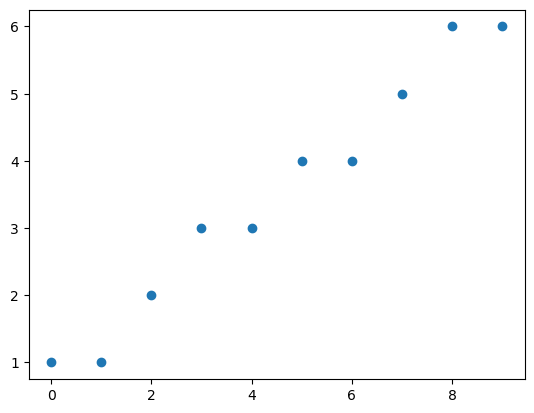

In [5]:
# your code here
rolling_dice.sort() #ordenado
df=pd.DataFrame(rolling_dice)#pasado a df
lst=[0,1,2,3,4,5,6,7,8,9] #esto es una chapuza, hay que hacer otra cosa
df
plt.scatter(lst, rolling_dice )

array([[<Axes: title={'center': '0'}>]], dtype=object)

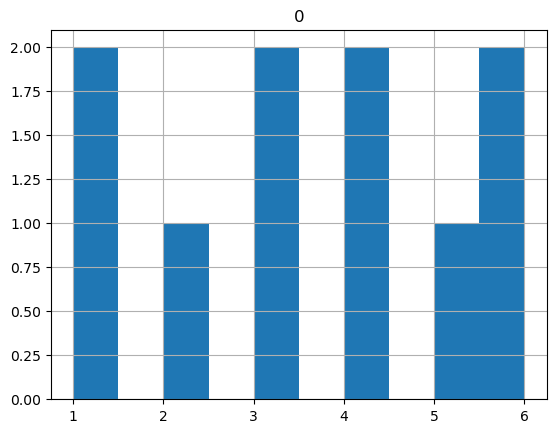

In [6]:
df.hist() #pandas hace el histograma

In [7]:
times=10
class_columns=df.value_counts()
class_columns


1    2
3    2
4    2
6    2
2    1
5    1
Name: count, dtype: int64

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

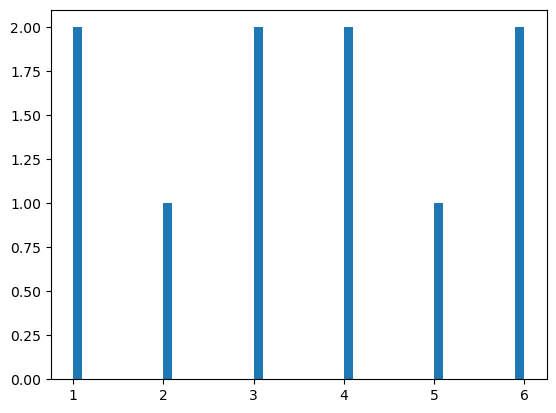

In [8]:
# your code here
plt.hist(df, bins=50)
plt.show()

In [ ]:
"""
Same data but different way of seeing & representing it.
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [18]:
# your code here


def mean(x):
    total_sum=0
    count=0
    for i in x:
        total_sum=total_sum+i
        count=count+1
    result=total_sum/count
    return result


In [19]:
mean(rolling_dice)

3.5

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [22]:
# your code here
frequency={}

for i in rolling_dice:
    if i in frequency:
        frequency[i]=frequency[i]+1
    else:
        frequency[i]=1

frequency

{1: 2, 2: 1, 3: 2, 4: 2, 5: 1, 6: 2}

In [112]:
#esto ya como función, que lo de arriba era un bucle y ya
def calculate_frequency(x):
    frequency = {}
    for i in x:
        if i in frequency:
            frequency[i] += 1
        else:
            frequency[i] = 1
    return frequency


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [84]:
# your code here
def median(x):
    x=sorted(x)
    number=len(x)
    print(number)
    if number%2!=0:
       
        return (x[number//2-1]+x[number//2])/2
    else:
            return x[(number//2)]
median([3,3,4,6,7,5])

6


5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [98]:
# your code here
def q1(x):
    x=sorted(x)
    number=len(x)
    q2=median(x)
    if number%2!=0:
       
            return median(x[:number // 2])

         
    
def q3(x):
    x=sorted(x)
    number=len(x)
    q2=median(x)
    if number%2!=0:
       
            return median(x[number//2+1:])
    else:
        return median(x[number // 2:])
            
q3(rolling_dice)
    

10
5


4.5

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [109]:
# your code here
df=pd.read_csv('../data/roll_the_dice_hundred.csv')
df.sort_values(by=['value'])
df
#I can't see a pattern...

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


In [ ]:
#I can't see a pattern...

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [110]:
# your code here
mean(df['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [113]:
# your code here
calculate_frequency(df['value'])

{1: 12, 2: 17, 6: 23, 5: 12, 4: 22, 3: 14}

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<Axes: >

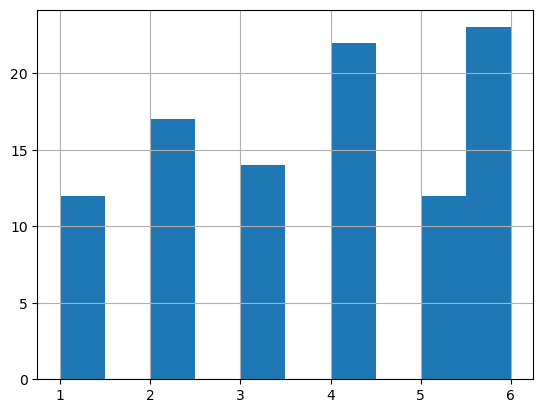

In [120]:
# your code here
df['value'].hist()

In [ ]:
"""
I have no insights...it seems to be random (i mean, not a pattern as far as i can see)
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

<Axes: >

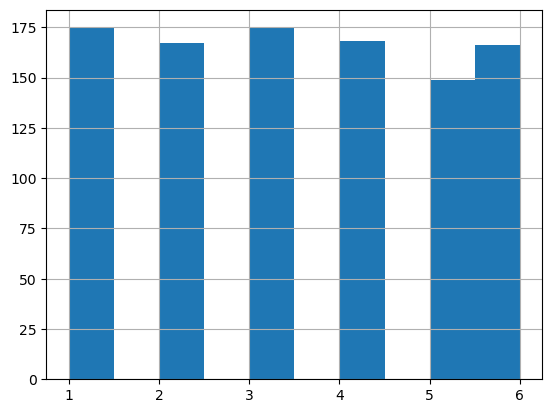

In [123]:
# your code here
df2=pd.read_csv('../data/roll_the_dice_thousand.csv')
df2.sort_values(by=['value'])
df2
df2['value'].hist()

In [ ]:
"""
Now it seems that all the values have the same frequency. As much measurements we have, the tendency is that the frequency of each number tends to be the same.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [147]:
# your code here
df3=pd.read_csv('../data/ages_population.csv')
df4=pd.read_csv('../data/ages_population2.csv')
df5=pd.read_csv('../data/ages_population3.csv')
df3.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


array([[<Axes: title={'center': 'observation'}>]], dtype=object)

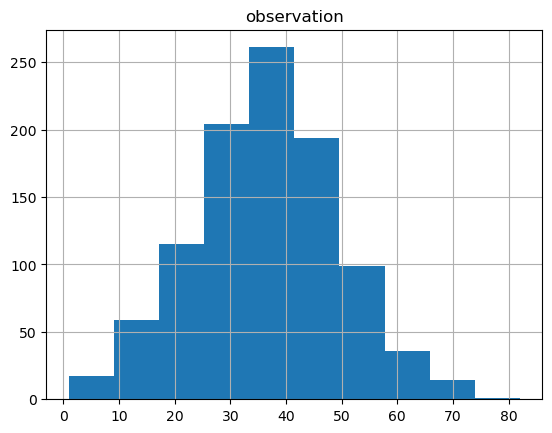

In [130]:

df3.hist()


array([[<Axes: title={'center': 'observation'}>]], dtype=object)

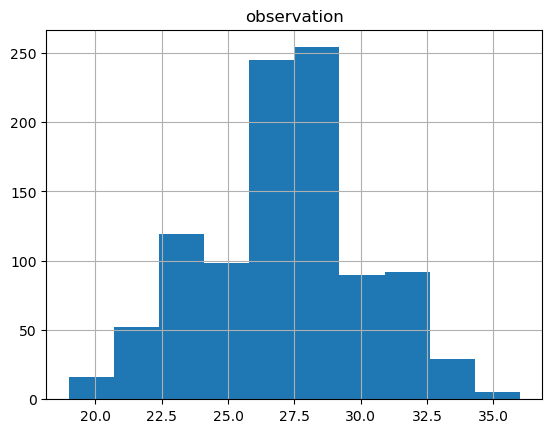

In [131]:
df4.hist()


array([[<Axes: title={'center': 'observation'}>]], dtype=object)

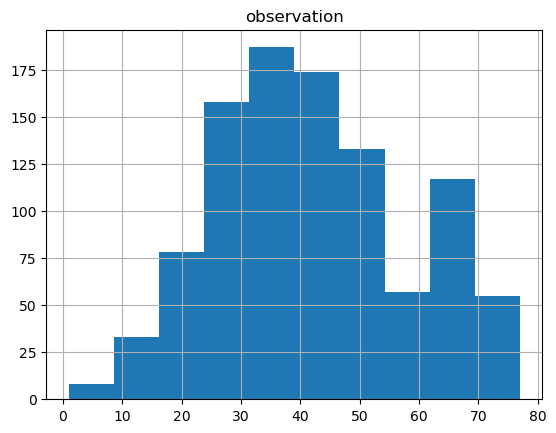

In [132]:
df5.hist()

In [ ]:
"""
mean first one: about 35
mean second one: about 27
mean thirs one:about 40 and the smallest standard deviation
your comments here
"""

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [136]:
# your code here
print('first one mean',df3.mean())
print('second one mean',df4.mean())
print('third one mean',df5.mean())

first one mean observation    36.56
dtype: float64
second one mean observation    27.155
dtype: float64
third one mean observation    41.989
dtype: float64


#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

<Axes: ylabel='observation'>

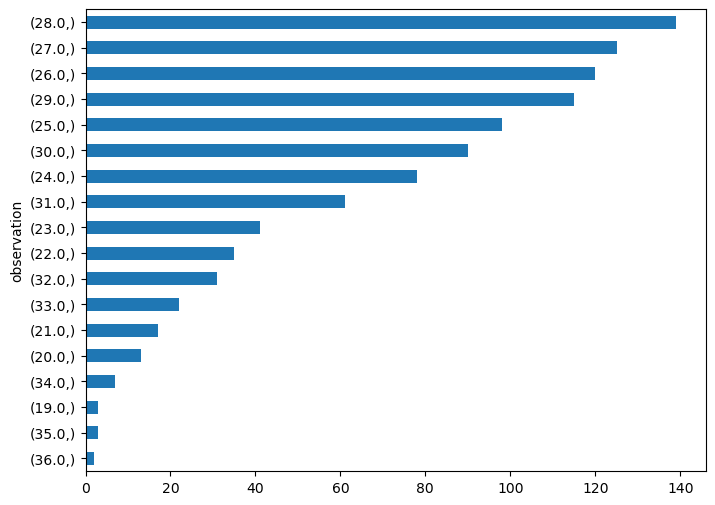

In [150]:
# your code here
value_counts=df4.value_counts().sort_values()
plt.figure(figsize=(8, 6))
value_counts.plot(kind='barh')

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
Yes, it not the same at all. It should be ordered in the same way to be able to compare both
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [152]:
# your code here
print('second one mean',df4.mean())
print('second one sd',df4.std())

second one mean observation    27.155
dtype: float64
second one sd observation    2.969814
dtype: float64


In [ ]:
"""
I was really close (i said the mean it's 27)
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [153]:
# your code here. Already done in the first cell:
df5.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [154]:
# your code here
'''
mean first one: about 35
mean second one: about 27
mean thirs one:about 40 and the smallest standard deviation
your comments here
'''

'\nmean first one: about 35\nmean second one: about 27\nmean thirs one:about 40 and the smallest standard deviation\nyour comments here\n'

In [155]:

print('third one mean',df5.mean())
print('third one mean',df5.std())

#I was really close as well in the media(40) but i thought the standard deviation would be the smallest and seems to be the biggest

third one mean observation    41.989
dtype: float64
third one mean observation    16.144706
dtype: float64


#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [156]:
# your code here
q1 = df5.quantile(0.25)
q2 = df5.quantile(0.50)  # Mediana
q3 = df5.quantile(0.75)

print("first quantile (Q1):", q1)
print("Median (Q2):", q2)
print("Third cuartil (Q3):", q3)



Primer cuartil (Q1): observation    30.0
Name: 0.25, dtype: float64
Mediana (Q2): observation    40.0
Name: 0.5, dtype: float64
Tercer cuartil (Q3): observation    53.0
Name: 0.75, dtype: float64


In [ ]:
"""
your comments here

The mean and the meadian are almost the same. That's why it was easier to calculate them at first sight
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""